In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install flair==0.12.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 373.1/373.1 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 788.5/788.5 kB 58.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 96.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 64.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 89.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 31.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB

In [3]:
!pip install transformers==4.30.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 31.7 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.33.2
    Uninstalling transformers-4.33.2:
      Successfully uninstalled transformers-4.33.2


In [4]:
from flair.data import Corpus
from flair.datasets import ColumnCorpus
from flair.embeddings import TokenEmbeddings, WordEmbeddings, StackedEmbeddings, FlairEmbeddings, FastTextEmbeddings
from typing import List

In [5]:
# Spanish corpus of 127 texts from ECHR (automatic translations) with projected and reviewed annotations

columns = {0:'text', 1:'ner'}

corpus_folder = '/content/drive/MyDrive/.../'
corpus : Corpus = ColumnCorpus(corpus_folder, columns,
                                    train_file='ES-all.tsv', column_delimiter=' ',
                                    dev_file=None,
                                    test_file=None
)

# obtain and print corpus statistics
stats = corpus.obtain_statistics()
print(stats)

2023-09-20 09:11:11,798 Reading data from /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler
2023-09-20 09:11:11,800 Train: /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler/ES-reviewed-PER.tsv
2023-09-20 09:11:11,801 Dev: None
2023-09-20 09:11:11,803 Test: None
{
    "TRAIN": {
        "dataset": "TRAIN",
        "total_number_of_documents": 3902,
        "number_of_documents_per_class": {
            "CODE": 240,
            "PER": 788,
            "DATETIME": 1927,
            "LOC": 356,
            "ORG": 488,
            "DEM": 152,
            "MISC": 143,
            "QUANTITY": 122,
            "null": 1
        },
        "number_of_tokens_per_tag": {},
        "number_of_tokens": {
            "total": 110234,
            "min": 1,
            "max": 556,
            "avg": 28.25064069707842
        }
    },
    "TEST": {
        "dataset": "TEST",
        "total_number_of_documents": 482,
        "number_of_documents_per_class": {
            "PER": 81,

In [6]:
# initialize sequence tagger
from flair.models import SequenceTagger

tagger = SequenceTagger.load("flair/ner-multi")

2023-09-20 09:15:05,522 SequenceTagger predicts: Dictionary with 20 tags: <unk>, O, B-PER, E-PER, S-LOC, B-MISC, I-MISC, E-MISC, S-PER, B-ORG, E-ORG, S-ORG, I-ORG, B-LOC, E-LOC, S-MISC, I-PER, I-LOC, <START>, <STOP>


In [7]:
# 2. what tag do we want to predict?
tag_type = 'ner'

# 3. make the tag dictionary from the corpus
new_tag_dictionary = corpus.make_label_dictionary(label_type=tag_type)
print(new_tag_dictionary.idx2item)

2023-09-20 09:15:06,212 Computing label dictionary. Progress:


3902it [00:00, 45354.51it/s]

2023-09-20 09:15:06,304 Dictionary created for label 'ner' with 10 values: DATETIME (seen 1927 times), PER (seen 788 times), ORG (seen 488 times), LOC (seen 356 times), CODE (seen 240 times), DEM (seen 152 times), MISC (seen 143 times), QUANTITY (seen 122 times), null (seen 1 times)
[b'<unk>', b'DATETIME', b'PER', b'ORG', b'LOC', b'CODE', b'DEM', b'MISC', b'QUANTITY', b'null']


In [8]:
print(tagger.label_dictionary.idx2item)

[b'<unk>', b'O', b'B-PER', b'E-PER', b'S-LOC', b'B-MISC', b'I-MISC', b'E-MISC', b'S-PER', b'B-ORG', b'E-ORG', b'S-ORG', b'I-ORG', b'B-LOC', b'E-LOC', b'S-MISC', b'I-PER', b'I-LOC', b'<START>', b'<STOP>']


In [9]:
new_tagger = SequenceTagger(tagger.embeddings, new_tag_dictionary, tag_type=tag_type)

2023-09-20 09:15:06,324 SequenceTagger predicts: Dictionary with 37 tags: O, S-DATETIME, B-DATETIME, E-DATETIME, I-DATETIME, S-PER, B-PER, E-PER, I-PER, S-ORG, B-ORG, E-ORG, I-ORG, S-LOC, B-LOC, E-LOC, I-LOC, S-CODE, B-CODE, E-CODE, I-CODE, S-DEM, B-DEM, E-DEM, I-DEM, S-MISC, B-MISC, E-MISC, I-MISC, S-QUANTITY, B-QUANTITY, E-QUANTITY, I-QUANTITY, S-null, B-null, E-null, I-null


In [10]:
# initialize trainer
from flair.trainers import ModelTrainer
trainer = ModelTrainer(new_tagger, corpus)

In [11]:
# train # train_with_dev=True
trainer.train('/content/drive/MyDrive/...',
              learning_rate=0.1,
              mini_batch_size=32,
              max_epochs=20,
              write_weights=True)
# saving the model into your drive (need to provide the full path of the folder in which you want to save the model)

2023-09-20 09:15:07,445 ----------------------------------------------------------------------------------------------------
2023-09-20 09:15:07,447 Model: "SequenceTagger(
  (embeddings): StackedEmbeddings(
    (list_embedding_0): WordEmbeddings(
      '/home/alan/.flair/embeddings/glove.gensim'
      (embedding): Embedding(400001, 100)
    )
    (list_embedding_1): WordEmbeddings(
      '/home/alan/.flair/embeddings/de-wiki-fasttext-300d-1M'
      (embedding): Embedding(1000000, 300)
    )
    (list_embedding_2): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.5, inplace=False)
        (encoder): Embedding(300, 100)
        (rnn): LSTM(100, 2048)
        (decoder): Linear(in_features=2048, out_features=300, bias=True)
      )
    )
    (list_embedding_3): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.5, inplace=False)
        (encoder): Embedding(300, 100)
        (rnn): LSTM(100, 2048)
        (decoder): Linear(in_features=2048, out_

100%|██████████| 14/14 [00:13<00:00,  1.07it/s]

2023-09-20 09:16:57,526 Evaluating as a multi-label problem: False
2023-09-20 09:16:57,553 DEV : loss 0.3370400667190552 - f1-score (micro avg)  0.5099
2023-09-20 09:16:57,614 BAD EPOCHS (no improvement): 0
2023-09-20 09:16:57,619 saving best model


2023-09-20 09:17:04,135 ----------------------------------------------------------------------------------------------------
2023-09-20 09:17:06,823 epoch 2 - iter 12/122 - loss 0.31682354 - time (sec): 2.69 - samples/sec: 3838.80 - lr: 0.100000
2023-09-20 09:17:10,373 epoch 2 - iter 24/122 - loss 0.28301476 - time (sec): 6.24 - samples/sec: 3392.36 - lr: 0.100000
2023-09-20 09:17:13,774 epoch 2 - iter 36/122 - loss 0.27719441 - time (sec): 9.64 - samples/sec: 3339.55 - lr: 0.100000
2023-09-20 09:17:17,187 epoch 2 - iter 48/122 - loss 0.26720824 - time (sec): 13.05 - samples/sec: 3259.95 - lr: 0.100000
2023-09-20 09:17:20,698 epoch 2 - iter 60/122 - loss 0.25296552 - time (sec): 16.56 - samples/sec: 3212.29 - lr: 0.100000
2023-09-20 09:17:26,001 epoch 2 - iter 72/122 - loss 0.27711427 - time (sec): 21.86 - samples/sec: 2933.62 - lr: 0.100000
2023-09-20 09:17:29,646 epoch 2 - iter 84/122 - loss 0.26968163 - time (sec): 25.51 - samples/sec: 2960.13 - lr: 0.100000
2023-09-20 09:17:33,594 

100%|██████████| 14/14 [00:04<00:00,  3.13it/s]

2023-09-20 09:17:46,420 Evaluating as a multi-label problem: False
2023-09-20 09:17:46,439 DEV : loss 0.1579141616821289 - f1-score (micro avg)  0.7113
2023-09-20 09:17:46,515 BAD EPOCHS (no improvement): 0
2023-09-20 09:17:46,519 saving best model


2023-09-20 09:17:53,267 ----------------------------------------------------------------------------------------------------
2023-09-20 09:17:56,166 epoch 3 - iter 12/122 - loss 0.23446375 - time (sec): 2.90 - samples/sec: 3806.26 - lr: 0.100000
2023-09-20 09:18:00,984 epoch 3 - iter 24/122 - loss 0.26665948 - time (sec): 7.71 - samples/sec: 2841.28 - lr: 0.100000
2023-09-20 09:18:04,521 epoch 3 - iter 36/122 - loss 0.23503464 - time (sec): 11.25 - samples/sec: 2938.15 - lr: 0.100000
2023-09-20 09:18:08,158 epoch 3 - iter 48/122 - loss 0.21867822 - time (sec): 14.89 - samples/sec: 2936.46 - lr: 0.100000
2023-09-20 09:18:11,577 epoch 3 - iter 60/122 - loss 0.20898023 - time (sec): 18.31 - samples/sec: 2966.70 - lr: 0.100000
2023-09-20 09:18:15,278 epoch 3 - iter 72/122 - loss 0.20459702 - time (sec): 22.01 - samples/sec: 2963.84 - lr: 0.100000
2023-09-20 09:18:18,634 epoch 3 - iter 84/122 - loss 0.20426931 - time (sec): 25.36 - samples/sec: 2999.40 - lr: 0.100000
2023-09-20 09:18:22,333

100%|██████████| 14/14 [00:05<00:00,  2.76it/s]

2023-09-20 09:18:35,632 Evaluating as a multi-label problem: False
2023-09-20 09:18:35,651 DEV : loss 0.1295342594385147 - f1-score (micro avg)  0.7118
2023-09-20 09:18:35,712 BAD EPOCHS (no improvement): 0
2023-09-20 09:18:35,717 saving best model


2023-09-20 09:18:42,275 ----------------------------------------------------------------------------------------------------
2023-09-20 09:18:45,050 epoch 4 - iter 12/122 - loss 0.14410514 - time (sec): 2.77 - samples/sec: 3904.36 - lr: 0.100000
2023-09-20 09:18:49,399 epoch 4 - iter 24/122 - loss 0.13532126 - time (sec): 7.12 - samples/sec: 3036.49 - lr: 0.100000
2023-09-20 09:18:54,662 epoch 4 - iter 36/122 - loss 0.17358510 - time (sec): 12.38 - samples/sec: 2661.46 - lr: 0.100000
2023-09-20 09:18:58,009 epoch 4 - iter 48/122 - loss 0.17104529 - time (sec): 15.73 - samples/sec: 2738.27 - lr: 0.100000
2023-09-20 09:19:01,448 epoch 4 - iter 60/122 - loss 0.16573077 - time (sec): 19.17 - samples/sec: 2800.00 - lr: 0.100000
2023-09-20 09:19:04,845 epoch 4 - iter 72/122 - loss 0.16364758 - time (sec): 22.57 - samples/sec: 2866.90 - lr: 0.100000
2023-09-20 09:19:08,799 epoch 4 - iter 84/122 - loss 0.16477388 - time (sec): 26.52 - samples/sec: 2863.30 - lr: 0.100000
2023-09-20 09:19:12,128

100%|██████████| 14/14 [00:04<00:00,  3.12it/s]

2023-09-20 09:19:24,962 Evaluating as a multi-label problem: False
2023-09-20 09:19:24,981 DEV : loss 0.11343512684106827 - f1-score (micro avg)  0.748
2023-09-20 09:19:25,041 BAD EPOCHS (no improvement): 0
2023-09-20 09:19:25,047 saving best model


2023-09-20 09:19:31,259 ----------------------------------------------------------------------------------------------------
2023-09-20 09:19:34,037 epoch 5 - iter 12/122 - loss 0.13512708 - time (sec): 2.78 - samples/sec: 3884.06 - lr: 0.100000
2023-09-20 09:19:37,884 epoch 5 - iter 24/122 - loss 0.13171739 - time (sec): 6.62 - samples/sec: 3277.56 - lr: 0.100000
2023-09-20 09:19:42,098 epoch 5 - iter 36/122 - loss 0.13725168 - time (sec): 10.84 - samples/sec: 3057.59 - lr: 0.100000
2023-09-20 09:19:45,400 epoch 5 - iter 48/122 - loss 0.13958448 - time (sec): 14.14 - samples/sec: 3111.65 - lr: 0.100000
2023-09-20 09:19:48,721 epoch 5 - iter 60/122 - loss 0.13992945 - time (sec): 17.46 - samples/sec: 3090.12 - lr: 0.100000
2023-09-20 09:19:52,184 epoch 5 - iter 72/122 - loss 0.13978159 - time (sec): 20.92 - samples/sec: 3082.94 - lr: 0.100000
2023-09-20 09:19:55,542 epoch 5 - iter 84/122 - loss 0.14008193 - time (sec): 24.28 - samples/sec: 3093.28 - lr: 0.100000
2023-09-20 09:20:00,873

100%|██████████| 14/14 [00:05<00:00,  2.62it/s]

2023-09-20 09:20:14,637 Evaluating as a multi-label problem: False
2023-09-20 09:20:14,656 DEV : loss 0.10336890816688538 - f1-score (micro avg)  0.7472
2023-09-20 09:20:14,726 BAD EPOCHS (no improvement): 1
2023-09-20 09:20:14,731 ----------------------------------------------------------------------------------------------------


2023-09-20 09:20:17,656 epoch 6 - iter 12/122 - loss 0.11948687 - time (sec): 2.92 - samples/sec: 3777.85 - lr: 0.100000
2023-09-20 09:20:21,131 epoch 6 - iter 24/122 - loss 0.13129516 - time (sec): 6.40 - samples/sec: 3463.14 - lr: 0.100000
2023-09-20 09:20:24,534 epoch 6 - iter 36/122 - loss 0.13168493 - time (sec): 9.80 - samples/sec: 3343.36 - lr: 0.100000
2023-09-20 09:20:28,204 epoch 6 - iter 48/122 - loss 0.13805137 - time (sec): 13.47 - samples/sec: 3220.71 - lr: 0.100000
2023-09-20 09:20:31,508 epoch 6 - iter 60/122 - loss 0.13569889 - time (sec): 16.78 - samples/sec: 3205.42 - lr: 0.100000
2023-09-20 09:20:35,191 epoch 6 - iter 72/122 - loss 0.13298010 - time (sec): 20.46 - samples/sec: 3158.73 - lr: 0.100000
2023-09-20 09:20:38,507 epoch 6 - iter 84/122 - loss 0.12936045 - time (sec): 23.77 - samples/sec: 3162.42 - lr: 0.100000
2023-09-20 09:20:43,754 epoch 6 - iter 96/122 - loss 0.14272356 - time (sec): 29.02 - samples/sec: 2978.67 - lr: 0.100000
2023-09-20 09:20:47,435 epo

100%|██████████| 14/14 [00:04<00:00,  3.04it/s]

2023-09-20 09:20:56,702 Evaluating as a multi-label problem: False
2023-09-20 09:20:56,722 DEV : loss 0.13313886523246765 - f1-score (micro avg)  0.7366
2023-09-20 09:20:56,782 BAD EPOCHS (no improvement): 2
2023-09-20 09:20:56,788 ----------------------------------------------------------------------------------------------------


2023-09-20 09:20:59,391 epoch 7 - iter 12/122 - loss 0.10650691 - time (sec): 2.60 - samples/sec: 4091.94 - lr: 0.100000
2023-09-20 09:21:02,770 epoch 7 - iter 24/122 - loss 0.11439763 - time (sec): 5.98 - samples/sec: 3567.55 - lr: 0.100000
2023-09-20 09:21:05,912 epoch 7 - iter 36/122 - loss 0.11328402 - time (sec): 9.12 - samples/sec: 3462.35 - lr: 0.100000
2023-09-20 09:21:09,245 epoch 7 - iter 48/122 - loss 0.11585628 - time (sec): 12.46 - samples/sec: 3391.54 - lr: 0.100000
2023-09-20 09:21:14,304 epoch 7 - iter 60/122 - loss 0.13238304 - time (sec): 17.51 - samples/sec: 3061.51 - lr: 0.100000
2023-09-20 09:21:18,115 epoch 7 - iter 72/122 - loss 0.13142430 - time (sec): 21.33 - samples/sec: 3061.86 - lr: 0.100000
2023-09-20 09:21:21,411 epoch 7 - iter 84/122 - loss 0.13020782 - time (sec): 24.62 - samples/sec: 3087.19 - lr: 0.100000
2023-09-20 09:21:24,957 epoch 7 - iter 96/122 - loss 0.12798740 - time (sec): 28.17 - samples/sec: 3098.71 - lr: 0.100000
2023-09-20 09:21:28,202 epo

100%|██████████| 14/14 [00:05<00:00,  2.75it/s]

2023-09-20 09:21:38,172 Evaluating as a multi-label problem: False
2023-09-20 09:21:38,190 DEV : loss 0.08811389654874802 - f1-score (micro avg)  0.7701
2023-09-20 09:21:38,249 BAD EPOCHS (no improvement): 0
2023-09-20 09:21:38,254 saving best model


2023-09-20 09:21:44,717 ----------------------------------------------------------------------------------------------------
2023-09-20 09:21:47,350 epoch 8 - iter 12/122 - loss 0.12682969 - time (sec): 2.63 - samples/sec: 3980.31 - lr: 0.100000
2023-09-20 09:21:51,639 epoch 8 - iter 24/122 - loss 0.10924741 - time (sec): 6.92 - samples/sec: 3072.28 - lr: 0.100000
2023-09-20 09:21:55,030 epoch 8 - iter 36/122 - loss 0.10727099 - time (sec): 10.31 - samples/sec: 3151.45 - lr: 0.100000
2023-09-20 09:21:58,881 epoch 8 - iter 48/122 - loss 0.10627711 - time (sec): 14.16 - samples/sec: 3042.64 - lr: 0.100000
2023-09-20 09:22:04,180 epoch 8 - iter 60/122 - loss 0.11248555 - time (sec): 19.46 - samples/sec: 2803.50 - lr: 0.100000
2023-09-20 09:22:07,591 epoch 8 - iter 72/122 - loss 0.11244476 - time (sec): 22.87 - samples/sec: 2862.16 - lr: 0.100000
2023-09-20 09:22:10,873 epoch 8 - iter 84/122 - loss 0.11174191 - time (sec): 26.15 - samples/sec: 2903.93 - lr: 0.100000
2023-09-20 09:22:14,109

100%|██████████| 14/14 [00:04<00:00,  3.15it/s]

2023-09-20 09:22:27,179 Evaluating as a multi-label problem: False
2023-09-20 09:22:27,196 DEV : loss 0.08436381816864014 - f1-score (micro avg)  0.8022
2023-09-20 09:22:27,259 BAD EPOCHS (no improvement): 0
2023-09-20 09:22:27,264 saving best model


2023-09-20 09:22:33,642 ----------------------------------------------------------------------------------------------------
2023-09-20 09:22:36,524 epoch 9 - iter 12/122 - loss 0.09543271 - time (sec): 2.83 - samples/sec: 3703.94 - lr: 0.100000
2023-09-20 09:22:40,062 epoch 9 - iter 24/122 - loss 0.09752072 - time (sec): 6.37 - samples/sec: 3378.26 - lr: 0.100000
2023-09-20 09:22:43,590 epoch 9 - iter 36/122 - loss 0.09604825 - time (sec): 9.90 - samples/sec: 3288.65 - lr: 0.100000
2023-09-20 09:22:47,163 epoch 9 - iter 48/122 - loss 0.09331223 - time (sec): 13.47 - samples/sec: 3212.00 - lr: 0.100000
2023-09-20 09:22:52,362 epoch 9 - iter 60/122 - loss 0.10745767 - time (sec): 18.67 - samples/sec: 2927.72 - lr: 0.100000
2023-09-20 09:22:55,898 epoch 9 - iter 72/122 - loss 0.10675149 - time (sec): 22.21 - samples/sec: 2958.87 - lr: 0.100000
2023-09-20 09:22:59,238 epoch 9 - iter 84/122 - loss 0.10670436 - time (sec): 25.55 - samples/sec: 2971.26 - lr: 0.100000
2023-09-20 09:23:02,459 

100%|██████████| 14/14 [00:04<00:00,  3.12it/s]

2023-09-20 09:23:16,120 Evaluating as a multi-label problem: False
2023-09-20 09:23:16,138 DEV : loss 0.08725470304489136 - f1-score (micro avg)  0.7935
2023-09-20 09:23:16,198 BAD EPOCHS (no improvement): 1
2023-09-20 09:23:16,203 ----------------------------------------------------------------------------------------------------


2023-09-20 09:23:19,200 epoch 10 - iter 12/122 - loss 0.10932545 - time (sec): 3.00 - samples/sec: 3733.77 - lr: 0.100000
2023-09-20 09:23:22,530 epoch 10 - iter 24/122 - loss 0.09931839 - time (sec): 6.33 - samples/sec: 3424.49 - lr: 0.100000
2023-09-20 09:23:27,623 epoch 10 - iter 36/122 - loss 0.11450282 - time (sec): 11.42 - samples/sec: 2904.04 - lr: 0.100000
2023-09-20 09:23:31,026 epoch 10 - iter 48/122 - loss 0.11043942 - time (sec): 14.82 - samples/sec: 2976.57 - lr: 0.100000
2023-09-20 09:23:34,369 epoch 10 - iter 60/122 - loss 0.10880349 - time (sec): 18.16 - samples/sec: 2999.17 - lr: 0.100000
2023-09-20 09:23:37,777 epoch 10 - iter 72/122 - loss 0.10416723 - time (sec): 21.57 - samples/sec: 3029.42 - lr: 0.100000
2023-09-20 09:23:41,257 epoch 10 - iter 84/122 - loss 0.10455439 - time (sec): 25.05 - samples/sec: 3031.81 - lr: 0.100000
2023-09-20 09:23:44,519 epoch 10 - iter 96/122 - loss 0.10325531 - time (sec): 28.31 - samples/sec: 3070.07 - lr: 0.100000
2023-09-20 09:23:4

100%|██████████| 14/14 [00:04<00:00,  3.18it/s]

2023-09-20 09:23:57,066 Evaluating as a multi-label problem: False
2023-09-20 09:23:57,085 DEV : loss 0.07353538274765015 - f1-score (micro avg)  0.8112
2023-09-20 09:23:57,147 BAD EPOCHS (no improvement): 0
2023-09-20 09:23:57,152 saving best model


2023-09-20 09:24:03,619 ----------------------------------------------------------------------------------------------------
2023-09-20 09:24:06,385 epoch 11 - iter 12/122 - loss 0.10315726 - time (sec): 2.76 - samples/sec: 3834.15 - lr: 0.100000
2023-09-20 09:24:09,692 epoch 11 - iter 24/122 - loss 0.09646689 - time (sec): 6.07 - samples/sec: 3434.16 - lr: 0.100000
2023-09-20 09:24:15,084 epoch 11 - iter 36/122 - loss 0.11496426 - time (sec): 11.46 - samples/sec: 2805.03 - lr: 0.100000
2023-09-20 09:24:18,499 epoch 11 - iter 48/122 - loss 0.10855685 - time (sec): 14.88 - samples/sec: 2900.45 - lr: 0.100000
2023-09-20 09:24:21,774 epoch 11 - iter 60/122 - loss 0.10464427 - time (sec): 18.15 - samples/sec: 2972.88 - lr: 0.100000
2023-09-20 09:24:25,976 epoch 11 - iter 72/122 - loss 0.10086049 - time (sec): 22.36 - samples/sec: 2886.95 - lr: 0.100000
2023-09-20 09:24:29,860 epoch 11 - iter 84/122 - loss 0.09877804 - time (sec): 26.24 - samples/sec: 2901.75 - lr: 0.100000
2023-09-20 09:24

100%|██████████| 14/14 [00:04<00:00,  2.96it/s]

2023-09-20 09:24:46,066 Evaluating as a multi-label problem: False
2023-09-20 09:24:46,084 DEV : loss 0.06898424029350281 - f1-score (micro avg)  0.8005
2023-09-20 09:24:46,145 BAD EPOCHS (no improvement): 1
2023-09-20 09:24:46,150 ----------------------------------------------------------------------------------------------------


2023-09-20 09:24:48,845 epoch 12 - iter 12/122 - loss 0.07720642 - time (sec): 2.69 - samples/sec: 3910.51 - lr: 0.100000
2023-09-20 09:24:51,952 epoch 12 - iter 24/122 - loss 0.08307491 - time (sec): 5.80 - samples/sec: 3589.45 - lr: 0.100000
2023-09-20 09:24:55,378 epoch 12 - iter 36/122 - loss 0.08412503 - time (sec): 9.23 - samples/sec: 3469.12 - lr: 0.100000
2023-09-20 09:24:58,814 epoch 12 - iter 48/122 - loss 0.08671380 - time (sec): 12.66 - samples/sec: 3351.70 - lr: 0.100000
2023-09-20 09:25:02,203 epoch 12 - iter 60/122 - loss 0.08435823 - time (sec): 16.05 - samples/sec: 3332.87 - lr: 0.100000
2023-09-20 09:25:05,938 epoch 12 - iter 72/122 - loss 0.08877376 - time (sec): 19.79 - samples/sec: 3247.83 - lr: 0.100000
2023-09-20 09:25:09,258 epoch 12 - iter 84/122 - loss 0.08697328 - time (sec): 23.11 - samples/sec: 3236.89 - lr: 0.100000
2023-09-20 09:25:14,395 epoch 12 - iter 96/122 - loss 0.09302431 - time (sec): 28.24 - samples/sec: 3060.55 - lr: 0.100000
2023-09-20 09:25:17

100%|██████████| 14/14 [00:04<00:00,  3.15it/s]

2023-09-20 09:25:26,607 Evaluating as a multi-label problem: False
2023-09-20 09:25:26,626 DEV : loss 0.06896281242370605 - f1-score (micro avg)  0.8062
2023-09-20 09:25:26,694 BAD EPOCHS (no improvement): 2
2023-09-20 09:25:26,700 ----------------------------------------------------------------------------------------------------


2023-09-20 09:25:29,358 epoch 13 - iter 12/122 - loss 0.08536645 - time (sec): 2.66 - samples/sec: 3968.64 - lr: 0.100000
2023-09-20 09:25:32,681 epoch 13 - iter 24/122 - loss 0.08350650 - time (sec): 5.98 - samples/sec: 3585.98 - lr: 0.100000
2023-09-20 09:25:36,959 epoch 13 - iter 36/122 - loss 0.07833364 - time (sec): 10.26 - samples/sec: 3229.23 - lr: 0.100000
2023-09-20 09:25:39,967 epoch 13 - iter 48/122 - loss 0.07799974 - time (sec): 13.26 - samples/sec: 3252.13 - lr: 0.100000
2023-09-20 09:25:43,335 epoch 13 - iter 60/122 - loss 0.07912652 - time (sec): 16.63 - samples/sec: 3237.82 - lr: 0.100000
2023-09-20 09:25:46,994 epoch 13 - iter 72/122 - loss 0.08309951 - time (sec): 20.29 - samples/sec: 3199.98 - lr: 0.100000
2023-09-20 09:25:50,604 epoch 13 - iter 84/122 - loss 0.08377167 - time (sec): 23.90 - samples/sec: 3185.22 - lr: 0.100000
2023-09-20 09:25:53,928 epoch 13 - iter 96/122 - loss 0.08266990 - time (sec): 27.23 - samples/sec: 3181.90 - lr: 0.100000
2023-09-20 09:25:5

100%|██████████| 14/14 [00:04<00:00,  3.18it/s]

2023-09-20 09:26:07,776 Evaluating as a multi-label problem: False
2023-09-20 09:26:07,795 DEV : loss 0.07084091007709503 - f1-score (micro avg)  0.8127
2023-09-20 09:26:07,856 BAD EPOCHS (no improvement): 0
2023-09-20 09:26:07,861 saving best model


2023-09-20 09:26:14,090 ----------------------------------------------------------------------------------------------------
2023-09-20 09:26:17,041 epoch 14 - iter 12/122 - loss 0.08679685 - time (sec): 2.95 - samples/sec: 3610.96 - lr: 0.100000
2023-09-20 09:26:20,314 epoch 14 - iter 24/122 - loss 0.07720137 - time (sec): 6.22 - samples/sec: 3451.29 - lr: 0.100000
2023-09-20 09:26:23,710 epoch 14 - iter 36/122 - loss 0.08016227 - time (sec): 9.62 - samples/sec: 3349.08 - lr: 0.100000
2023-09-20 09:26:27,022 epoch 14 - iter 48/122 - loss 0.08211812 - time (sec): 12.93 - samples/sec: 3286.76 - lr: 0.100000
2023-09-20 09:26:30,397 epoch 14 - iter 60/122 - loss 0.08386973 - time (sec): 16.30 - samples/sec: 3251.56 - lr: 0.100000
2023-09-20 09:26:34,076 epoch 14 - iter 72/122 - loss 0.08062824 - time (sec): 19.98 - samples/sec: 3212.43 - lr: 0.100000
2023-09-20 09:26:37,520 epoch 14 - iter 84/122 - loss 0.08185571 - time (sec): 23.43 - samples/sec: 3212.08 - lr: 0.100000
2023-09-20 09:26:

100%|██████████| 14/14 [00:05<00:00,  2.69it/s]

2023-09-20 09:26:56,006 Evaluating as a multi-label problem: False
2023-09-20 09:26:56,028 DEV : loss 0.06541086733341217 - f1-score (micro avg)  0.7942
2023-09-20 09:26:56,098 BAD EPOCHS (no improvement): 1
2023-09-20 09:26:56,104 ----------------------------------------------------------------------------------------------------


2023-09-20 09:26:58,874 epoch 15 - iter 12/122 - loss 0.08597755 - time (sec): 2.77 - samples/sec: 3721.24 - lr: 0.100000
2023-09-20 09:27:02,431 epoch 15 - iter 24/122 - loss 0.08457155 - time (sec): 6.33 - samples/sec: 3357.94 - lr: 0.100000
2023-09-20 09:27:07,493 epoch 15 - iter 36/122 - loss 0.09568104 - time (sec): 11.39 - samples/sec: 2815.14 - lr: 0.100000
2023-09-20 09:27:10,764 epoch 15 - iter 48/122 - loss 0.08779687 - time (sec): 14.66 - samples/sec: 2913.29 - lr: 0.100000
2023-09-20 09:27:14,020 epoch 15 - iter 60/122 - loss 0.08482976 - time (sec): 17.91 - samples/sec: 3012.36 - lr: 0.100000
2023-09-20 09:27:17,402 epoch 15 - iter 72/122 - loss 0.08001771 - time (sec): 21.30 - samples/sec: 3053.10 - lr: 0.100000
2023-09-20 09:27:21,071 epoch 15 - iter 84/122 - loss 0.07812310 - time (sec): 24.97 - samples/sec: 3033.35 - lr: 0.100000
2023-09-20 09:27:24,532 epoch 15 - iter 96/122 - loss 0.07945169 - time (sec): 28.43 - samples/sec: 3055.14 - lr: 0.100000
2023-09-20 09:27:2

100%|██████████| 14/14 [00:04<00:00,  3.19it/s]

2023-09-20 09:27:36,918 Evaluating as a multi-label problem: False
2023-09-20 09:27:36,936 DEV : loss 0.06454717367887497 - f1-score (micro avg)  0.8018
2023-09-20 09:27:36,997 BAD EPOCHS (no improvement): 2
2023-09-20 09:27:37,002 ----------------------------------------------------------------------------------------------------


2023-09-20 09:27:39,727 epoch 16 - iter 12/122 - loss 0.07794567 - time (sec): 2.72 - samples/sec: 4090.19 - lr: 0.100000
2023-09-20 09:27:43,101 epoch 16 - iter 24/122 - loss 0.07825039 - time (sec): 6.10 - samples/sec: 3638.85 - lr: 0.100000
2023-09-20 09:27:46,244 epoch 16 - iter 36/122 - loss 0.06919823 - time (sec): 9.24 - samples/sec: 3568.35 - lr: 0.100000
2023-09-20 09:27:49,668 epoch 16 - iter 48/122 - loss 0.07232860 - time (sec): 12.66 - samples/sec: 3474.29 - lr: 0.100000
2023-09-20 09:27:54,971 epoch 16 - iter 60/122 - loss 0.08036308 - time (sec): 17.97 - samples/sec: 3126.62 - lr: 0.100000
2023-09-20 09:27:58,257 epoch 16 - iter 72/122 - loss 0.07873278 - time (sec): 21.25 - samples/sec: 3127.76 - lr: 0.100000
2023-09-20 09:28:01,499 epoch 16 - iter 84/122 - loss 0.07781718 - time (sec): 24.50 - samples/sec: 3164.95 - lr: 0.100000
2023-09-20 09:28:04,766 epoch 16 - iter 96/122 - loss 0.07734817 - time (sec): 27.76 - samples/sec: 3163.39 - lr: 0.100000
2023-09-20 09:28:08

100%|██████████| 14/14 [00:04<00:00,  2.84it/s]

2023-09-20 09:28:17,327 Evaluating as a multi-label problem: False
2023-09-20 09:28:17,344 DEV : loss 0.06612101942300797 - f1-score (micro avg)  0.8023
2023-09-20 09:28:17,405 BAD EPOCHS (no improvement): 3
2023-09-20 09:28:17,410 ----------------------------------------------------------------------------------------------------


2023-09-20 09:28:20,294 epoch 17 - iter 12/122 - loss 0.06708617 - time (sec): 2.88 - samples/sec: 3756.02 - lr: 0.100000
2023-09-20 09:28:23,760 epoch 17 - iter 24/122 - loss 0.07191283 - time (sec): 6.35 - samples/sec: 3372.84 - lr: 0.100000
2023-09-20 09:28:28,659 epoch 17 - iter 36/122 - loss 0.08723285 - time (sec): 11.25 - samples/sec: 2899.62 - lr: 0.100000
2023-09-20 09:28:31,832 epoch 17 - iter 48/122 - loss 0.08267141 - time (sec): 14.42 - samples/sec: 2965.64 - lr: 0.100000
2023-09-20 09:28:35,161 epoch 17 - iter 60/122 - loss 0.07749637 - time (sec): 17.75 - samples/sec: 3034.52 - lr: 0.100000
2023-09-20 09:28:38,769 epoch 17 - iter 72/122 - loss 0.07946720 - time (sec): 21.36 - samples/sec: 3027.11 - lr: 0.100000
2023-09-20 09:28:41,903 epoch 17 - iter 84/122 - loss 0.07678121 - time (sec): 24.49 - samples/sec: 3075.30 - lr: 0.100000
2023-09-20 09:28:45,365 epoch 17 - iter 96/122 - loss 0.07596997 - time (sec): 27.95 - samples/sec: 3110.64 - lr: 0.100000
2023-09-20 09:28:4

100%|██████████| 14/14 [00:04<00:00,  3.28it/s]

2023-09-20 09:28:57,325 Evaluating as a multi-label problem: False
2023-09-20 09:28:57,343 DEV : loss 0.061355289071798325 - f1-score (micro avg)  0.7996
2023-09-20 09:28:57,404 Epoch    17: reducing learning rate of group 0 to 5.0000e-02.
2023-09-20 09:28:57,406 BAD EPOCHS (no improvement): 4
2023-09-20 09:28:57,411 ----------------------------------------------------------------------------------------------------


2023-09-20 09:29:01,848 epoch 18 - iter 12/122 - loss 0.11967293 - time (sec): 4.43 - samples/sec: 2553.15 - lr: 0.050000
2023-09-20 09:29:05,069 epoch 18 - iter 24/122 - loss 0.08668287 - time (sec): 7.66 - samples/sec: 2919.48 - lr: 0.050000
2023-09-20 09:29:08,389 epoch 18 - iter 36/122 - loss 0.07712612 - time (sec): 10.98 - samples/sec: 3007.45 - lr: 0.050000
2023-09-20 09:29:12,012 epoch 18 - iter 48/122 - loss 0.07439640 - time (sec): 14.60 - samples/sec: 3009.56 - lr: 0.050000
2023-09-20 09:29:15,495 epoch 18 - iter 60/122 - loss 0.07193959 - time (sec): 18.08 - samples/sec: 2991.31 - lr: 0.050000
2023-09-20 09:29:18,682 epoch 18 - iter 72/122 - loss 0.07022330 - time (sec): 21.27 - samples/sec: 3034.02 - lr: 0.050000
2023-09-20 09:29:22,458 epoch 18 - iter 84/122 - loss 0.07262001 - time (sec): 25.05 - samples/sec: 3023.69 - lr: 0.050000
2023-09-20 09:29:25,677 epoch 18 - iter 96/122 - loss 0.07152965 - time (sec): 28.26 - samples/sec: 3044.48 - lr: 0.050000
2023-09-20 09:29:2

100%|██████████| 14/14 [00:05<00:00,  2.75it/s]

2023-09-20 09:29:38,385 Evaluating as a multi-label problem: False
2023-09-20 09:29:38,403 DEV : loss 0.05935045704245567 - f1-score (micro avg)  0.8044
2023-09-20 09:29:38,463 BAD EPOCHS (no improvement): 1
2023-09-20 09:29:38,468 ----------------------------------------------------------------------------------------------------


2023-09-20 09:29:41,283 epoch 19 - iter 12/122 - loss 0.05207055 - time (sec): 2.81 - samples/sec: 3991.89 - lr: 0.050000
2023-09-20 09:29:44,522 epoch 19 - iter 24/122 - loss 0.05801078 - time (sec): 6.05 - samples/sec: 3540.11 - lr: 0.050000
2023-09-20 09:29:47,956 epoch 19 - iter 36/122 - loss 0.05414133 - time (sec): 9.49 - samples/sec: 3419.94 - lr: 0.050000
2023-09-20 09:29:51,116 epoch 19 - iter 48/122 - loss 0.05611102 - time (sec): 12.65 - samples/sec: 3409.52 - lr: 0.050000
2023-09-20 09:29:54,851 epoch 19 - iter 60/122 - loss 0.05977694 - time (sec): 16.38 - samples/sec: 3299.60 - lr: 0.050000
2023-09-20 09:29:57,956 epoch 19 - iter 72/122 - loss 0.05986402 - time (sec): 19.49 - samples/sec: 3294.41 - lr: 0.050000
2023-09-20 09:30:01,168 epoch 19 - iter 84/122 - loss 0.05834555 - time (sec): 22.70 - samples/sec: 3317.75 - lr: 0.050000
2023-09-20 09:30:04,753 epoch 19 - iter 96/122 - loss 0.06170587 - time (sec): 26.28 - samples/sec: 3292.94 - lr: 0.050000
2023-09-20 09:30:09

100%|██████████| 14/14 [00:04<00:00,  3.25it/s]

2023-09-20 09:30:18,228 Evaluating as a multi-label problem: False
2023-09-20 09:30:18,246 DEV : loss 0.05722612887620926 - f1-score (micro avg)  0.8173
2023-09-20 09:30:18,306 BAD EPOCHS (no improvement): 0
2023-09-20 09:30:18,311 saving best model


2023-09-20 09:30:24,343 ----------------------------------------------------------------------------------------------------
2023-09-20 09:30:27,147 epoch 20 - iter 12/122 - loss 0.05745576 - time (sec): 2.80 - samples/sec: 3735.78 - lr: 0.050000
2023-09-20 09:30:31,392 epoch 20 - iter 24/122 - loss 0.05613635 - time (sec): 7.05 - samples/sec: 3036.33 - lr: 0.050000
2023-09-20 09:30:34,729 epoch 20 - iter 36/122 - loss 0.05670881 - time (sec): 10.38 - samples/sec: 3106.67 - lr: 0.050000
2023-09-20 09:30:38,036 epoch 20 - iter 48/122 - loss 0.05831487 - time (sec): 13.69 - samples/sec: 3133.57 - lr: 0.050000
2023-09-20 09:30:41,607 epoch 20 - iter 60/122 - loss 0.05604258 - time (sec): 17.26 - samples/sec: 3111.93 - lr: 0.050000
2023-09-20 09:30:46,805 epoch 20 - iter 72/122 - loss 0.05789959 - time (sec): 22.46 - samples/sec: 2867.13 - lr: 0.050000
2023-09-20 09:30:50,605 epoch 20 - iter 84/122 - loss 0.05898363 - time (sec): 26.26 - samples/sec: 2891.97 - lr: 0.050000
2023-09-20 09:30

100%|██████████| 14/14 [00:05<00:00,  2.69it/s]

2023-09-20 09:31:07,687 Evaluating as a multi-label problem: False
2023-09-20 09:31:07,706 DEV : loss 0.05755659565329552 - f1-score (micro avg)  0.8165
2023-09-20 09:31:07,767 BAD EPOCHS (no improvement): 1


2023-09-20 09:31:15,606 ----------------------------------------------------------------------------------------------------
2023-09-20 09:31:20,673 SequenceTagger predicts: Dictionary with 39 tags: O, S-DATETIME, B-DATETIME, E-DATETIME, I-DATETIME, S-PER, B-PER, E-PER, I-PER, S-ORG, B-ORG, E-ORG, I-ORG, S-LOC, B-LOC, E-LOC, I-LOC, S-CODE, B-CODE, E-CODE, I-CODE, S-DEM, B-DEM, E-DEM, I-DEM, S-MISC, B-MISC, E-MISC, I-MISC, S-QUANTITY, B-QUANTITY, E-QUANTITY, I-QUANTITY, S-null, B-null, E-null, I-null, <START>, <STOP>


100%|██████████| 16/16 [00:09<00:00,  1.73it/s]

2023-09-20 09:31:30,590 Evaluating as a multi-label problem: False
2023-09-20 09:31:30,615 0.8268	0.765	0.7947	0.6642
2023-09-20 09:31:30,617 
Results:
- F-score (micro) 0.7947
- F-score (macro) 0.6062
- Accuracy 0.6642

By class:
              precision    recall  f1-score   support

    DATETIME     0.8778    0.8940    0.8858       217
         PER     0.8182    0.8889    0.8521        81
         ORG     0.6552    0.6552    0.6552        58
         LOC     0.8537    0.7292    0.7865        48
        CODE     0.9167    0.9167    0.9167        12
        MISC     1.0000    0.1000    0.1818        20
         DEM     0.0000    0.0000    0.0000        19
    QUANTITY     0.7500    0.4615    0.5714        13

   micro avg     0.8268    0.7650    0.7947       468
   macro avg     0.7339    0.5807    0.6062       468
weighted avg     0.8045    0.7650    0.7672       468

2023-09-20 09:31:30,619 ----------------------------------------------------------------------------------------------

{'test_score': 0.7946725860155383,
 'dev_score_history': [0.5099236641221374,
  0.711340206185567,
  0.711825487944891,
  0.7480045610034208,
  0.74719800747198,
  0.7366211962224554,
  0.7701421800947867,
  0.8022099447513813,
  0.7934655775962661,
  0.8112359550561797,
  0.8004667444574095,
  0.8062015503875969,
  0.8127128263337118,
  0.7942157953281425,
  0.801791713325868,
  0.8023391812865498,
  0.799554565701559,
  0.8044198895027624,
  0.8172531214528943,
  0.8164627363737486],
 'train_loss_history': [0.5179411644171433,
  0.2485243659935909,
  0.1878128066984211,
  0.15895256500518215,
  0.15086317267415225,
  0.13702408856529066,
  0.12434495702040659,
  0.11097962097957527,
  0.10805011951847887,
  0.10242270845428815,
  0.0973362630857993,
  0.09182975959096104,
  0.0856514474677164,
  0.08371041499645074,
  0.08009912524861884,
  0.07618414913814023,
  0.07635484869119329,
  0.07025112930929886,
  0.062381240737034396,
  0.05902858936019059],
 'dev_loss_history': [0.337040

2023-09-20 09:31:30,639 ----------------------------------------------------------------------------------------------------
2023-09-20 09:31:30,641 WARNING: No LOSS found for test split in this data.
2023-09-20 09:31:30,641 Are you sure you want to plot LOSS and not another value?
2023-09-20 09:31:30,642 ----------------------------------------------------------------------------------------------------
2023-09-20 09:31:30,673 ----------------------------------------------------------------------------------------------------
2023-09-20 09:31:30,674 WARNING: No F1 found for test split in this data.
2023-09-20 09:31:30,675 Are you sure you want to plot F1 and not another value?
2023-09-20 09:31:30,677 ----------------------------------------------------------------------------------------------------
2023-09-20 09:31:31,875 Loss and F1 plots are saved in /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler/Flair-ES/Flair-ECHR-train-ES/Flair-Hug-model-ES-all/training.png


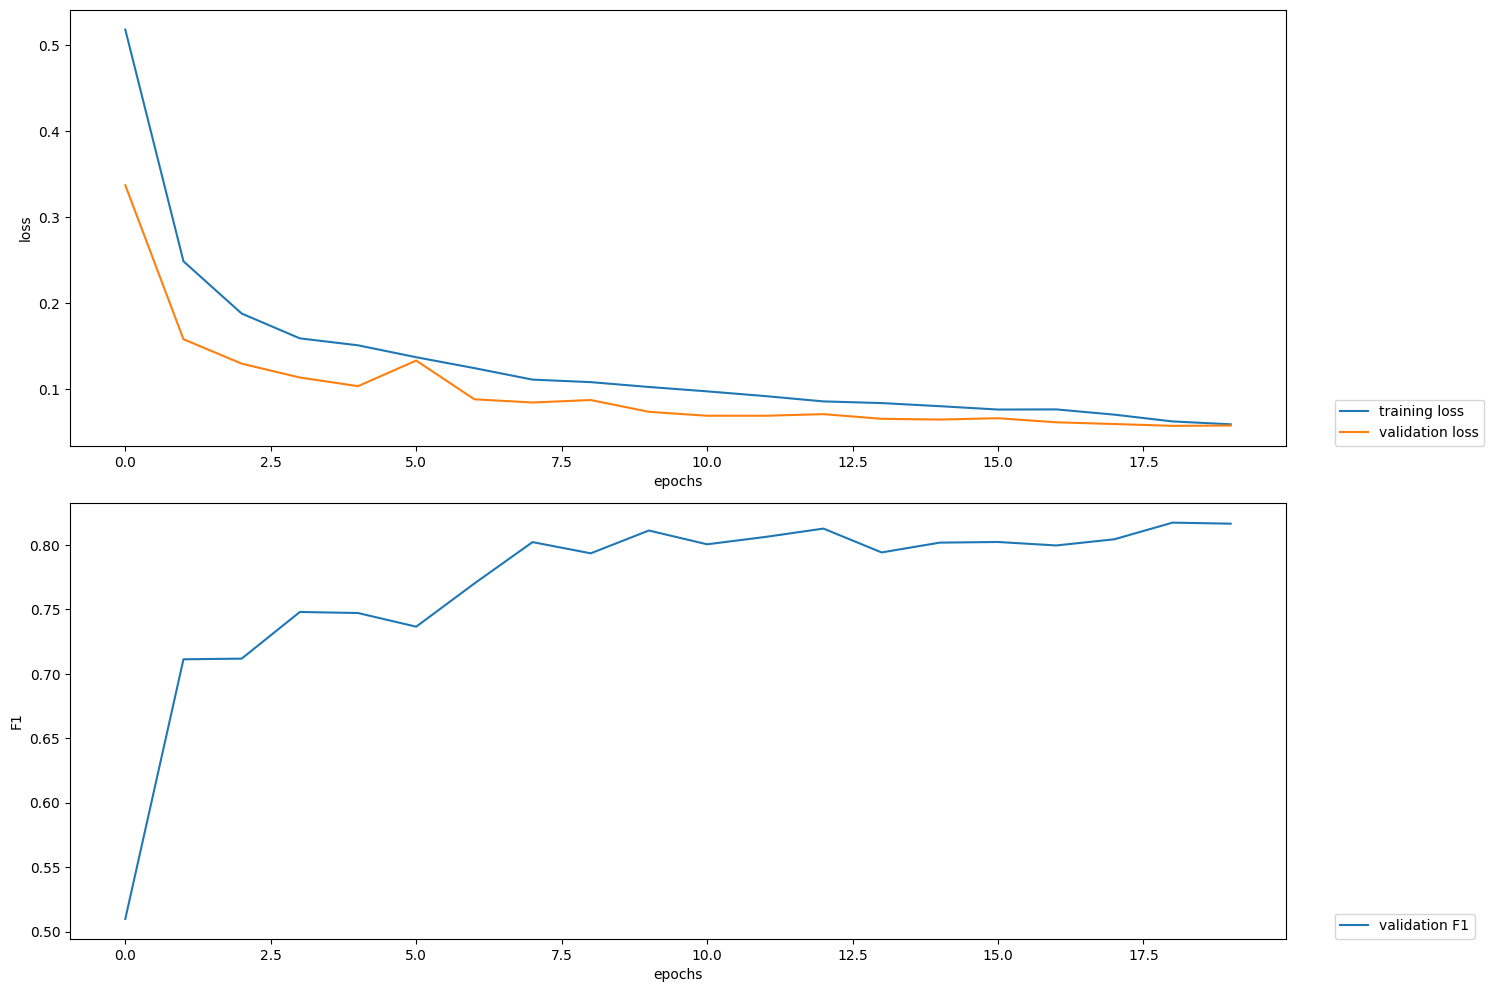

2023-09-20 09:31:35,770 Weights plots are saved in /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler/Flair-ES/Flair-ECHR-train-ES/Flair-Hug-model-ES-all/weights.png


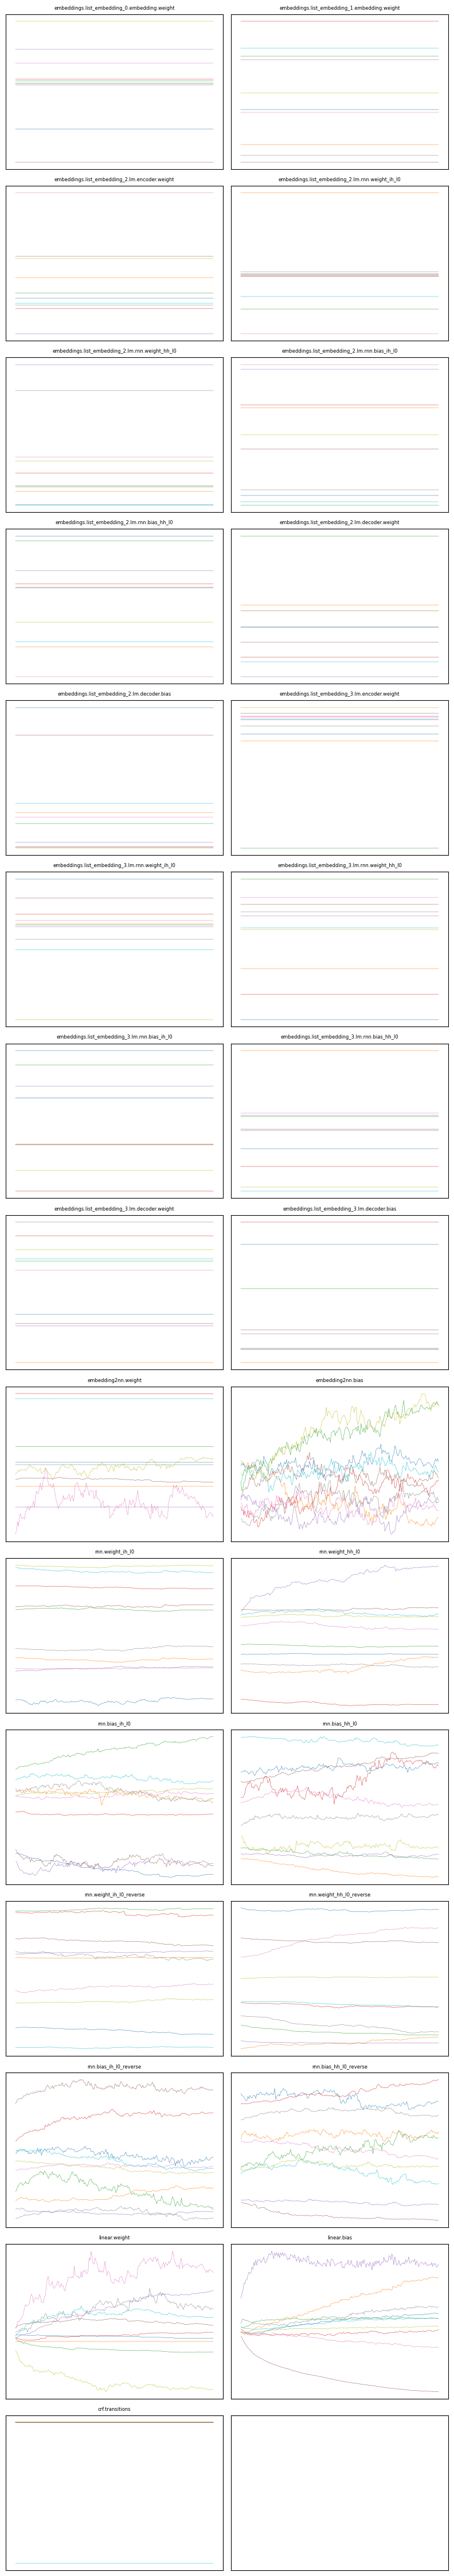

In [12]:
# plot training loss and weights
# Check documentation on training models with Flair

from flair.visual.training_curves import Plotter

plotter = Plotter()
plotter.plot_training_curves('/content/drive/MyDrive/.../loss.tsv')
plotter.plot_weights('/content/drive/MyDrive/.../weights.txt')